Initial setup

In [31]:
%reload_ext autoreload
%autoreload 2

In [32]:
%run "Common setup.ipynb"

In [33]:
RC = mk.RecordCollection("tmp/rest_requested_corpora.txt")
corpora_df = wosis.rc_to_df(RC)

In [34]:
wos_config = wosis.load_config('config.yml')

<hr> Convert manually sorted papers to dataframe

In [35]:
import pandas as pd

In [36]:
software_packages = pd.read_csv("../data/refined_software_packages_rest.csv")

In [37]:
software_rc = wosis.extract_recs(software_packages.loc[:, 'id'], RC, name='Software Packages')

<hr>Analysing the software data
<br> - Keyword trend
<br> - Publication trend

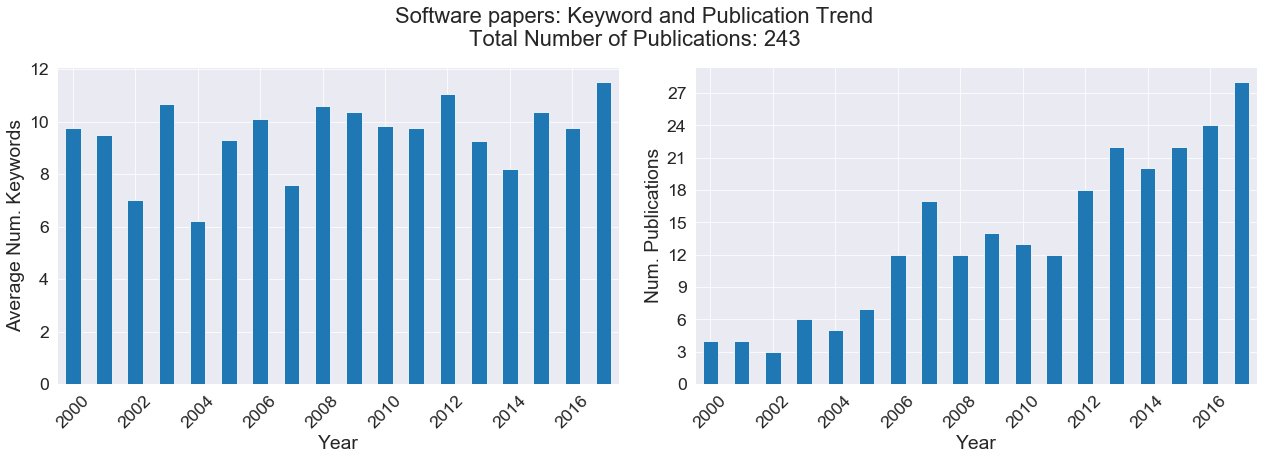

In [38]:
wos_plot.plot_kw_trend(software_rc, title='Software papers: Keyword and Publication Trend', save_plot_fn='figs/software_kw_trend.png')

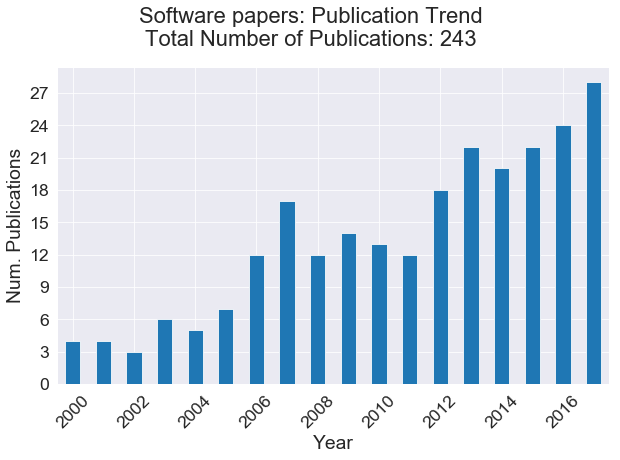

In [39]:
wos_plot.plot_pub_trend(software_rc, title='Software papers: Publication Trend', save_plot_fn='figs/software_pub_trend.png')

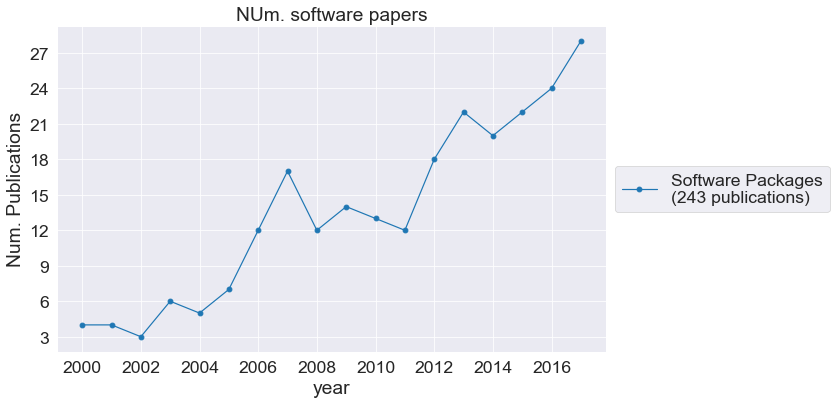

In [40]:
wos_plot.plot_topic_trend([software_rc], total_rc=False, title='Num. software papers', save_plot_fn='figs/software_topic_trend')

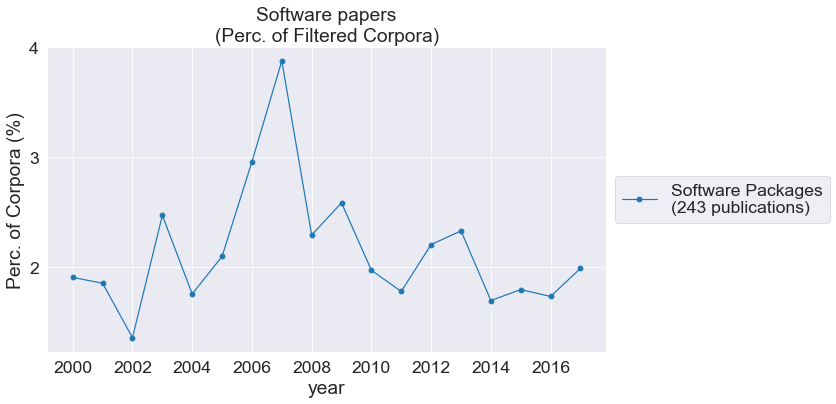

In [41]:
wos_plot.plot_topic_trend([software_rc], total_rc=RC, title='Software papers\n(Perc. of Filtered Corpora)', save_plot_fn='figs/software_topic_trend')

<hr> 
   - Identifying UA/SA/optimization in the corpora <br>
   - Ploting keyword, publication, and topic trend

In [44]:
UQ = wosis.keyword_matches(software_rc, ['uncertainty analysis', 'ua', 'uncertainty quantification'], threshold=95.0)

In [45]:
all_uq = UQ.combine_recs()

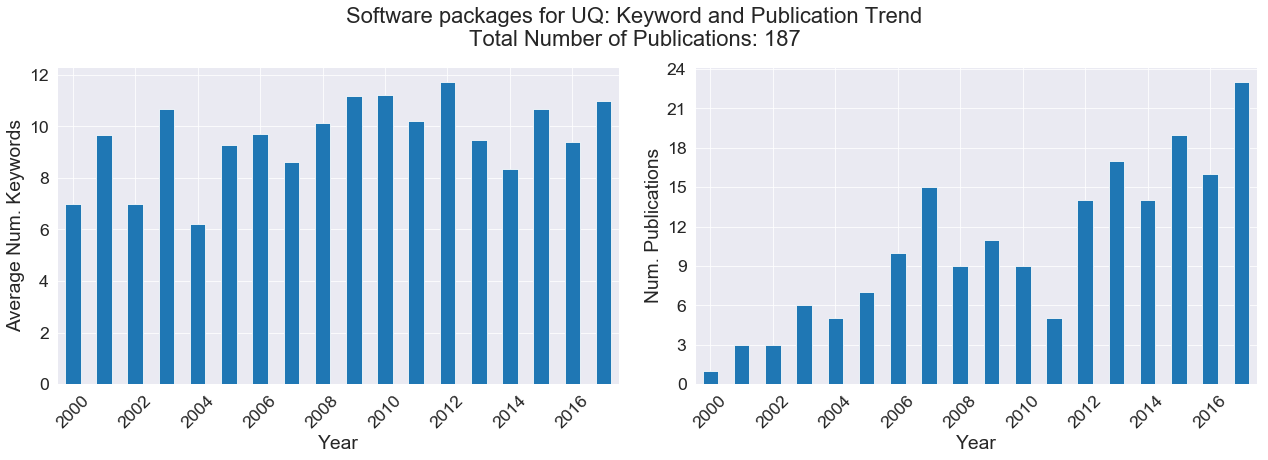

In [46]:
wos_plot.plot_kw_trend(all_uq, title='Software packages for UQ: Keyword and Publication Trend', save_plot_fn='figs/uq_pub_trend.png')

In [47]:
SA = wosis.keyword_matches(software_rc, ['sensitivity analysis', 'sa'], threshold=95.0)

In [48]:
all_sa = SA.combine_recs()

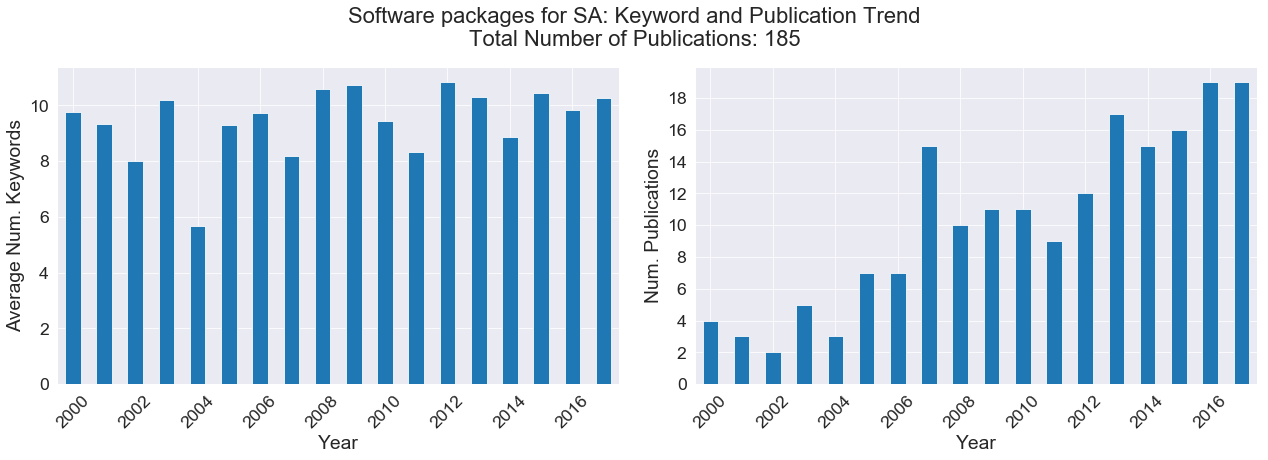

In [49]:
wos_plot.plot_kw_trend(all_sa, title='Software packages for SA: Keyword and Publication Trend', save_plot_fn='figs/sa_pub_trend.png')

In [60]:
optimization = wosis.keyword_matches(software_rc, ['optimization'], threshold=95.0)

In [61]:
all_optimization = optimization.combine_recs()

In [52]:
all_opt_df = wosis.rc_to_df(all_optimization)
all_opt_df.loc[all_opt_df['year'] == 2007, 'title'].tolist()

['Methods and object-oriented software for FE reliability and sensitivity analysis with application to a bridge structure',
 'Application of non-linear automatic optimization techniques for calibration of HSPF',
 'Parameter estimation and uncertainty analysis for a watershed model',
 'Reliability-based multiobjective optimization for automotive crashworthiness and occupant safety',
 'Topology optimization of material-nonlinear continuum structures by the element connectivity parameterization',
 'Parallel computing techniques for sensitivity analysis in optimum structural design']

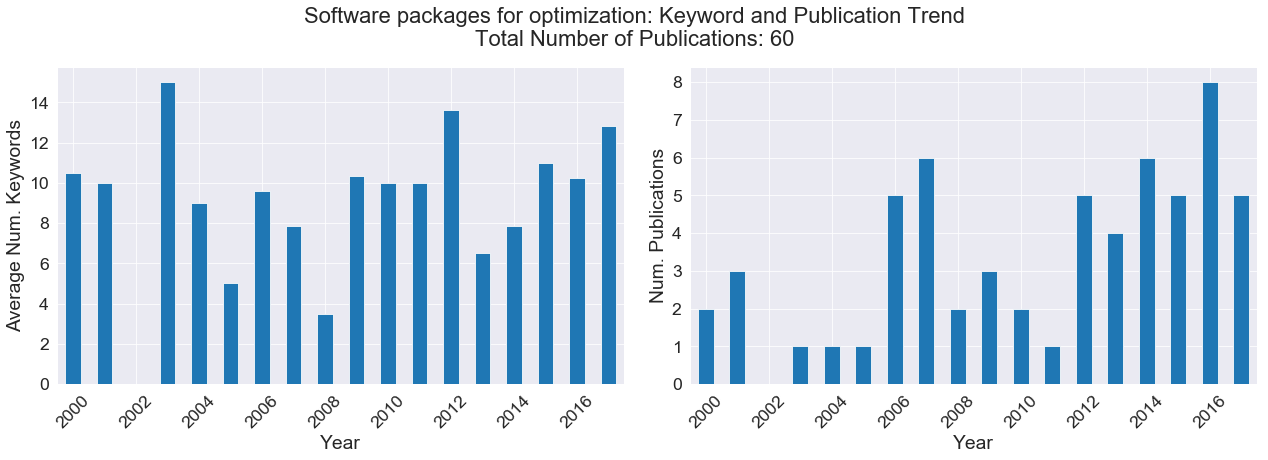

In [53]:
wos_plot.plot_kw_trend(all_optimization, title='Software packages for optimization: Keyword and Publication Trend', save_plot_fn='figs/opti_pub_trend.png')

In [62]:
all_uq.name = 'UQ'
all_sa.name = 'SA'
#all_optimization.name = 'Optimization'

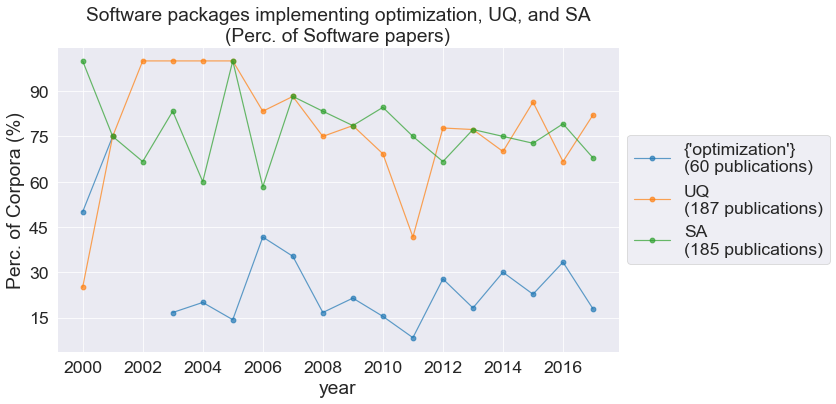

In [65]:
wos_plot.plot_topic_trend([all_optimization, all_uq, all_sa], total_rc=software_rc, title='Software packages implementing optimization, UQ, and SA\n(Perc. of Software papers)', save_plot_fn='figs/software_uasa_topics_keyword_trend_percentage.png')

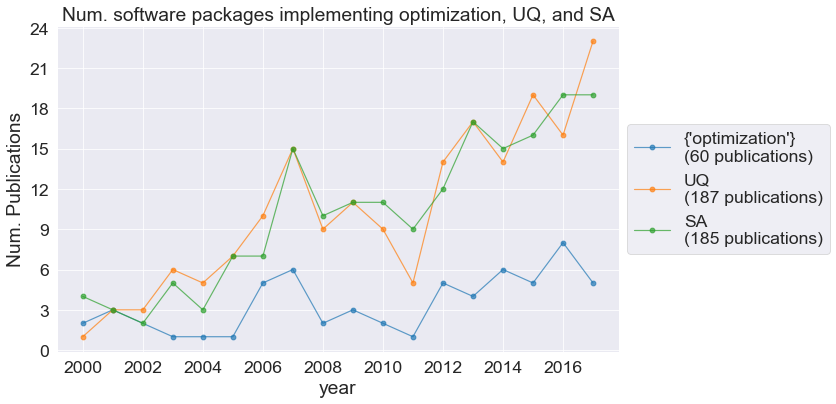

In [67]:
wos_plot.plot_topic_trend([all_optimization, all_uq, all_sa], title='Num. software packages implementing optimization, UQ, and SA', save_plot_fn='figs/software_uasa_topics_keyword_trend.png')

<hr> Running a key-phrase extraction on UA/SA/optimization to identify the fields using this software.

In [23]:
ua_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_ua))

In [24]:
ua_phrases.display_phrases()

Non-stationary extreme value analysis in a changing climate (2014) 
https://dx.doi.org/10.1007/s10584-014-1254-5 

The software presents the results of non-stationary extreme value analysis using various exceedance probability methods. 

This paper introduces a framework for estimating stationary and non-stationary return levels, return periods, and risks of climatic extremes using Bayesian inference. 

NEVA includes posterior probability intervals (uncertainty bounds) of estimated return levels through Bayesian inference, with its inherent advantages in uncertainty quantification. 

This framework is implemented in the Non-stationary Extreme Value Analysis (NEVA) software package, explicitly designed to facilitate analysis of extremes in the geosciences. 


A computer program for a Monte Carlo analysis of sensitivity in equations of environmental modelling obtained from experimental data (2002) 
https://dx.doi.org/10.1016/S0965-9978(02)00023-6 

The authors consider that it is useful 

In ESLSO, finite element analysis other than static analysis is performed, equivalent static loads (ESLs) are generated, linear static response structural optimization is carried out with the ESLs and the process iterates. 

The structure of the system is systematically defined and the software is developed by the C++ language on the Windows operating system. 

In the real world, structural systems may not have linear static characteristics. 


PUQ; A code for non-intrusive uncertainty propagation in computer simulations (2015) 
https://dx.doi.org/10.1016/j.cpc.2015.04.011 

PUQ orchestrates runs of the nanoPLASTICITY tool at nanoHUB where users can propagate uncertainties in dislocation dynamics simulations using simply a web browser, without downloading or installing any software. 

The code is available for download and also available for cloud computing in nanoHUB. 

of lines in distributed program, including test data, etc. 

of bytes in distributed program, including test data, e

This is presented for the first time in the relevant literature and is the most efficient among other possible schemes on condition that the design variables are much more than the environmental ones; this is definitely true in most engineering design problems. 

To compute these derivatives with the minimum CPU cost, a combination of the direct differentiation and the discrete adjoint variable method is proposed. 

The extension to D and D flow problems, after developing the corresponding direct differentiation and adjoint variable methods and software, is straightforward. 


Hierarchical approach to hydrological model calibration (2017) 
https://dx.doi.org/10.1007/s12665-017-6560-6 

In this study, a hierarchical HRU approach was developed in order to increase model performance and reduce computational complexity simultaneously. 

Spatial unit of water balance calculations may differ widely in different models from grids to hydrological response units (HRU). 

Then, each HRU is furth

The proposed methods are applied successfully to an Iranian arch dam, and good results are achieved. 

This paper presents an efficient methodology to find the optimum shape of arch dams. 

In order to create the geometry of arch dams a new algorithm based on Hermit Splines is proposed. 

The sensitivity analysis is performed using the concept of mesh design velocity. 


Adaptive stochastic Galerkin FEM (2014) 
https://dx.doi.org/10.1016/j.cma.2013.11.015 

Details on the implementation with the open-source software framework ALEA are presented; it is generic, and is based on available stiffness and mass matrices of a FEM for the deterministic, nonparametric nominal problem evaluated in the FEniCS environment. 

The reliability of the residual estimator is established. 

Asynchronous mesh adaptation for different gpc coefficients is permitted, subject to a minimal compatibility requirement on meshes used for different gpc coefficients. 

Numerical experiments in two spatial dimensions 

Monthly patterns of precipitation, snowfall, evapotranspiration (ET), and total water yield were similar for all the basins, while subsurface lateral flow was the dominant hydrologic pathway, contributing between  and % to gross basin water yields on an average annual basis. 

Overall, results indicated the strong influence of snowmelt and groundwater processes on amounts and timing of streamflows in the study basins. 

The state of Colorado in the United States comprises a principal snow catchment area, with all major headwater river basins in Colorado providing substantial water flows to surrounding western and midwestern states. 

In particular, examination of monthly streamflow residuals indicated that the normality and independence of model residuals, which are often assumed in parameter estimation and uncertainty analysis, were not always satisfied. 


IPH-TRIM3D-PCLake: A three-dimensional complex dynamic model for subtropical aquatic ecosystems (2009) 
https://dx.doi.org/10.101

Research and development in hydroinformatics can play an important role in environmental impact assessment by integrating physically-based models, data-driven models and other information and Communication Tools (ICT). 

SWAT operates on the river basin scale and includes processes for the assessment of complex diffuse pollution; it is open-source software, which allows for site-specific modifications to the source and easy linkage to other hydroinformatics tools. 


Estimation of uncertainty sources in the projections of Lithuanian river runoff (2013) 
https://dx.doi.org/10.1007/s00477-012-0608-7 

The emission scenarios had much greater influence on the runoff projection than the global climate models. 

Particular attention is given to the reliability of hydrological modelling results. 

The hydrological model parameters had less impact on the reliability of the modelling results. 

The impact of model parameters on the runoff modelling results was estimated using a sensitivity anal

Scales and similarities in runoff processes with respect to geomorphometry (2000) 
https://dx.doi.org/10.1002/1099-1085(20000815/30)14:11/12<1963::AID-HYP48>3.0.CO;2-M 

Therefore, geomorphometric classifications of catchment types could form a basis for representative hydrological modelling at the large scale. 

Models describing soil distribution in relation to geomorphometry could assist regionalization of spatial heterogeneity and structure of soil parameters relevant in hydrological modelling. 

Hydrological models (SAKE and TOPMODEL) were then used to simulate rainfall-runoff processes, and finally statistical tools and sensitivity analysis were applied to gain an insight into the hydrological significance of the various geomorphometric properties. 

In this study several computer techniques and models were applied to investigate the effects of geomorphometry on rainfall-runoff processes at different scales. 

Spatial distributions of soil types are partly related to morphometry 

Results indicate that northeastern, eastern and central regions have the lowest potential PCE concentrations in abstraction groundwater and therefore are the best sites for locating new boreholes. 


A tool for risk-based management of surface water quality (2004) 
https://dx.doi.org/10.1016/j.envsoft.2003.12.003 

Water quality Risk Analysis Tool (WaterRAT) is software for supporting decision-making in surface water quality management. 

Using sensitivity and uncertainty analyses based on Monte Carlo simulation and first order methods, WaterRAT allows the modeller to identify the significant uncertainties, and evaluate the degree to which they control decision-making risk. 


MCE-RISK: integrating multicriteria evaluation and CIS for risk decision-making in natural hazards (2001) 
https://dx.doi.org/10.1016/S1364-8152(01)00006-8 

After implementing the alternative MCE-GIS methods, and comparing final outputs and the computational difficulty involved in the analysis, WLC is recommende

These examples illustrate DEMM methodology on problems of interest in environmental fate and risk assessment. 

Rather than sampling input distributions and running hundreds or thousands of model calculations as in Monte Carlo or Latin Hypercube Sampling, DEMM carries a representation of each distribution throughout the calculation of the dependent variable. 

Environmental processes are wrought with uncertainty. 


MVC2: A MATLAB graphical interface toolbox for second-order multivariate calibration (2009) 
https://dx.doi.org/10.1016/j.chemolab.2009.02.005 

This work reports the release of Multivariate Calibration  (MVC), a MATLAB graphical interface toolbox for implementing several second-order multivariate calibration methodologies. 

Prediction results are produced along with analytical figures of merit and standard concentration errors, as calculated by modern concepts of uncertainty propagation. 


Sensitivity Analysis for Bayesian Hierarchical Models (2015) 
https://dx.doi.org/1

In-depth study of the published models reveals a clear evolution over time in the concept of modelling, from just hydraulic empirical models to D ones and from simple first-order water quality models to complex ones which describe key biochemical processes as a set of mathematical equations. 


Operational snow mapping with simplified data assimilation using the seNorge snow model (2016) 
https://dx.doi.org/10.1016/j.jhydrol.2016.03.061 

In this paper the revised seNorge snow model (v...) for snow mapping is described, and a simplified data assimilation procedure is introduced to correct detected snow model biases in near real-time. 

The model and analysis codes as well as the "R" statistical software are freely available. 

Numerical snow models are often applied in snow map production for operational hydrological services. 

The data assimilation procedure is theoretically based on the Bayesian updating paradigm and is meant to be pragmatic with modest computational and input data 

In [25]:
sa_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_sa))

In [26]:
sa_phrases.display_phrases()

A computer program for a Monte Carlo analysis of sensitivity in equations of environmental modelling obtained from experimental data (2002) 
https://dx.doi.org/10.1016/S0965-9978(02)00023-6 

The authors consider that it is useful to obtain new parameters that relate the sensitivity of the equations to the variations that are produced by the experimental data. 

On the other hand, they discuss a computing algorithm that allows the analysis of sensitivity (and stability) of the mathematical equations, which are built from any methodology. 

On the one hand, the authors present a theoretical study of sensitivity of the models according to different points of view. 

This will allow the selection of the model according to new criteria. 

An interface has been incorporated into this algorithm to allow a graphic visualisation of the effects that are produced when modifications of the model are carried out. 


Enhancing the Characterization of Epistemic Uncertainties in PM2.5 Risk Analyses (

when a spatially averaged network of four rain gauges was used. 

This study evaluated the effect of temporal and spatial rainfall resolution on the predictive performance of Hydrological Simulation Program-Fortran (HSPF) using manual and automatic calibration procedures. 

Furthermore, the effect of automatic parameter estimation on the physical significance of calibrated parameter values was evaluated. 

when individual rain gauges (RG, RG, RG, and RG) were used one at a time. 

Model efficiency improved and ranged from . 


Artificial neural networks to predict daylight illuminance in office buildings (2009) 
https://dx.doi.org/10.1016/j.buildenv.2008.11.012 

Illuminance was used as the output variable. 

A prediction model was developed to determine daylight illuminance for the office buildings by using artificial neural networks (ANNs). 

In ANN modeling, the data were divided into two groups; the first  of these data sets were used for training and the remaining  for testing. 



This life cycle assessment evaluates and quantifies the environmental impacts of the production of hydrogen and transportation fuels from the fast pyrolysis and upgrading of corn stover. 

software is employed to estimate the environmental impacts. 

kg CO()eq and . 


Parameterization based shape optimization: theory and practical implementation aspects (2005) 
https://dx.doi.org/10.1108/02644400510603041 

Findings - The proposed approach offers an unified approach to shape optimization of skeletal, as well as continuous structures. 

The design element is used to retrieve the nodal geometrical data of finite elements (FEs). 

Purpose - To present an approach to parameterization based shape optimization of statically loaded structures and to propose its practical implementation. 

Originality/value - The paper offers a rather simple, but quite powerful approach to structural shape optimization together with practical hints for its computational implementation. 

For practical impleme

https://dx.doi.org/10.1016/j.cageo.2005.10.007 

The SIMLAB software was used, both to generate the input sample and to calculate the sensitivity indices. 

Analysis of the sensitivity of predictions of slope instability to input data and model uncertainties provides a rationale for targeted site investigation and iterative refinement of geotechnical models. 

Variance-based sensitivity analysis (VBSA) provides a global, model-independent sensitivity measure. 


A model-independent Particle Swarm Optimisation software for model calibration (2013) 
https://dx.doi.org/10.1016/j.envsoft.2013.01.004 

This work presents and illustrates the application of hydroPSO, a novel multi-OS and model-independent R package used for model calibration. 

hydroPSO implements several state-of-the-art enhancements and fine-tuning options to the Particle Swarm Optimisation (PSO) algorithm to meet specific user needs. 

Although we limit the application of hydroPSO to hydrological models, flexibility of the

The rupture of a high-pressure natural gas pipeline can lead to consequences that can pose a significant threat to people and property in the close vicinity to the pipeline fault location. 

For this purpose, authors present available statistical information and probabilistic analysis related to failures of natural gas pipelines. 

The measures of uncertainty and sensitivity analysis were estimated and outcomes presented applying software system for uncertainty and sensitivity analysis. 


Methods and object-oriented software for FE reliability and sensitivity analysis with application to a bridge structure (2007) 
https://dx.doi.org/10.1061/(ASCE)0887-3801(2007)21:3(151) 

The product is a comprehensive and freely available library of software tools for finite-element reliability and response sensitivity analysis. 

The required response sensitivities are obtained by an extensive implementation of the direct differentiation method. 

This paper addresses the growing demand for finite-

https://dx.doi.org/10.1097/HP.0b013e3181cd3d47 

In this study we took into consideration the uncertainties associated with a routine monitoring program in order to evaluate the minimum intake and dose detectable for a given level of confidence. 

Potential internal contaminations of workers are monitored by periodic bioassays interpreted in terms of intake and committed effective dose through biokinetic and dosimetric models. 

These techniques are implemented in the OPSCI software under development. 

Major sources of uncertainty are the contamination time, the size distribution and absorption into blood of the incorporated particles, and the measurement errors. 

After a prospective evaluation of exposure at a workplace, a suitable monitoring program can be defined by the choice of measurement techniques and frequency of measurements. 


Improving Thermal Comfort of Low-Income Housing in Thailand through Passive Design Strategies (2017) 
https://dx.doi.org/10.3390/su9081440 

degree

The results generated by this procedure in terms of granulometry of the assembly of particles were very close to the user specifications with errors on the number of particles and on their size averaging .% and .%, respectively. 


Automatic differentiation strategy for the local sensitivity analysis of a one-dimensional hydraulic model (2011) 
https://dx.doi.org/10.1002/fld.2263 

More specifically, Tapenade software, in the tangent linear mode (TLM), has been used to calculate derivatives of the model outputs (discharge and water level) with respect to the bottom friction expressed in terms of Strickler relation. 


An integrated assessment tool to define effective air quality policies at regional scale (2012) 
https://dx.doi.org/10.1016/j.envsoft.2012.07.004 

The novel features in RIAT are then compared to the state-of-the-art in integrated assessment of air quality, for example the ability to handle nonlinearities (instead of the usual linear approach) and the multi-objective fram

Application of non-linear automatic optimization techniques for calibration of HSPF (2007) 
https://dx.doi.org/10.2175/106143007X156862 

Optimization results obtained by these methods are very similar, although in most cases RSM out performs GML and SCE-UA outperforms RSM. 

In the current research, three non-linear automatic optimization techniques are applied and compared, as well an efficient way to calibrate HSPF is suggested. 

As more parameters were optimized simultaneously - a wider range of parameter values can maintain the model in the calibrated state. 

All three methods proved to be more efficient than manual HSPF calibration. 

Parameter optimization using local and global optimization techniques for the watershed model is discussed. 


On ISSM and leveraging the Cloud towards faster quantification of the uncertainty in ice-sheet mass balance projections (2016) 
https://dx.doi.org/10.1016/j.cageo.2016.08.007 

We show how errors in the projections were accurately quantif

The EFSA Guidance Document on the risk assessment of plant protection products in bees highlights the need for the inclusion of an uncertainty analysis, other routes of exposures and multiple stressors such as chemical mixtures and biological agents. 

The European Food Safety Authority (EFSA) is deploying resources and efforts to move towards a holistic risk assessment approach of multiple stressors in bees. 

Finally, the recent work conducted at EFSA is presented, under the over-arching MUST-B project ("EU efforts towards the development of a holistic approach for the risk assessment on MUltiple STressors in Bees") comprising a toolbox for harmonised data collection under field conditions and a mechanistic model to assess effects from pesticides and other stressors such as biological agents and beekeeping management practices, at the colony level and in a spatially complex landscape. 


Automatic versus manual model differentiation to compute sensitivities and solve non-linear inver

The new numerical implementation of asymptotic homogenization method (NIAH, Cheng (Acta Mech Sinica (): -, ) and Cai (Int J Solids Struct (), -, ) is applied to homogenization of periodic plate structures and analytic sensitivity analysis of effective stiffness with respect to the topological design variables in both macro-scale and micro-scale. 

The volume preserving nonlinear density filter is applied to obtain the black-white optimum topology and comparison of its different sensitivities is made to show the reason for oscillation during optimization process in Appendix. 

Two kinds of plates are considered. 


Development of a Long-term, Ecologically Oriented Dam Release Plan for the Lake Baiyangdian Sub-basin, Northern China (2013) 
https://dx.doi.org/10.1007/s11269-012-0198-7 

The results of the optimization analysis provide a set of effective compromises among the target objectives that can guide future management of water releases from the reservoir. 

To determine the limitat

In [27]:
opt_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_optimization))

In [28]:
opt_phrases.display_phrases()

A toolbox using the stochastic optimization algorithm MIPT and ChemCAD for the systematic process retrofit of complex chemical processes (2016) 
https://dx.doi.org/10.1016/j.compchemeng.2015.08.023 

An optimization framework for the purpose of retrofitting using a rigorous process simulation tool is proposed to fulfill this task. 

The results of a sensitivity analysis and the optimization for different feed compositions are presented. 

The toolbox provides a quick evaluation of the process by searching for the global optimum. 

The usage of a rigorous process simulator is providing a high accuracy of the thermodynamic results which is necessary to evaluate the influence of the new process design. 

To simplify the user input a graphical user interface was programmed. 


Non-stationary extreme value analysis in a changing climate (2014) 
https://dx.doi.org/10.1007/s10584-014-1254-5 

The software presents the results of non-stationary extreme value analysis using various exceedance p

In this paper, the design parameterization capabilities developed previously have been applied to support design optimization of engineering products, including a High Mobility Multi-purpose Wheeled Vehicle (HMMWV). 

In the proposed environment, Pro/ENGINEER and SolidWorks are supported for product model representation, DADS (Dynamic Analysis and Design System) is employed for dynamic simulation of mechanical systems including ground vehicles, and DOT (Design Optimization Tool) is included for a batch mode design optimization. 

In order to demonstrate the feasibility of such an environment, design parameterization that supports capturing design intents in product solid models must be available, and advanced modeling, simulation, and optimization technologies implemented in engineering software tools must be incorporated. 


An evolutionary optimization of diffuser shapes based on CFD simulations (2010) 
https://dx.doi.org/10.1002/fld.2124 

The indigenously developed algorithm uses t

Numerical snow models are often applied in snow map production for operational hydrological services. 

The data assimilation procedure is theoretically based on the Bayesian updating paradigm and is meant to be pragmatic with modest computational and input data requirements. 

Frequently updated maps of snow conditions are useful for many applications, e.g., for avalanche and flood forecasting services, hydropower energy situation analysis, as well as for the general public. 


Analyzing the effects of geological and parameter uncertainty on prediction of groundwater head and travel time (2013) 
https://dx.doi.org/10.5194/hess-17-3245-2013 

Uncertainty of groundwater model predictions has in the past mostly been related to uncertainty in the hydraulic parameters, whereas uncertainty in the geological structure has not been considered to the same extent. 

In the second scenario the same  geological models were subjected to model optimization, where the hydraulic parameters for each o

Model-independent software Parameter ESTimation (PEST) was used to auto-calibrate ISWAT, a modified version of the distributed hydrologic model Soil and Water Assessment Tool (SWAT), in the Shenandoah River watershed. 

Multi-objective model optimization methods have been extensively studied based on evolutionary algorithms, but less on gradient-based algorithms. 


Environmental impact assessment based on dynamic fuzzy simulation (2014) 
https://dx.doi.org/10.1016/j.envsoft.2014.02.001 

A new "quick scan" method for an expert-/stakeholder-based impact assessment approach is introduced. 

This open modeling process also forms the basis of the credibility of the simulation results. 




<hr> Top-cited journals for UA/SA/optimization
<br> - Original intention was to find top cited for each three collections, but there was significant overlap, so just ran the analysis on the entire refined_software collection

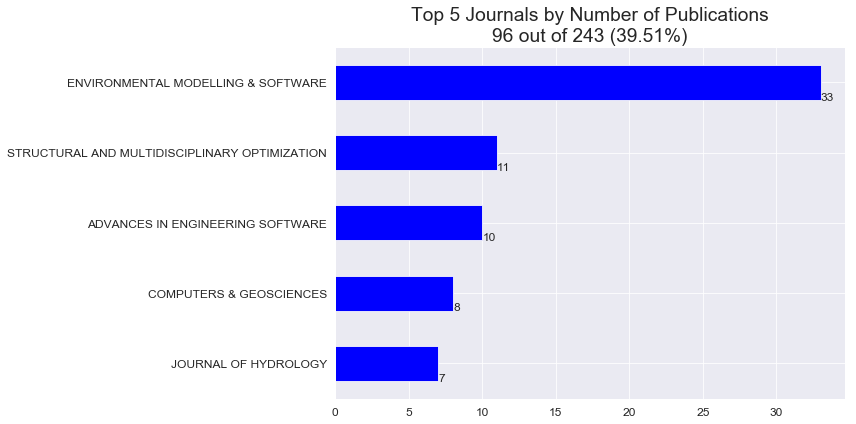

In [25]:
wos_plot.plot_pubs_per_journal(software_rc, top_n=5, annotate=True, show_stats=True, save_plot_fn='figs/software2_journal_pubs.png')

In [27]:
journals_of_interest_software = ['Environmental Modelling & Software'.upper(), 'Journal of Hydrology'.upper(), 'Computers & Geosciences'.upper(), 'Structural and Multidisciplinary Optimization'.upper(), 'Advances in Engineering Software'.upper()]
pubs_for_journals_software = wosis.find_pubs_by_journal(software_rc, journals_of_interest_software)

In [28]:
data_dir = "tmp"  # Using the temporary data directory 
                    #- should this be a different tmp?

# Get citations for each paper
paper_citations_per_journal_software = {}
for pubs in pubs_for_journals_software:
    paper_citations_per_journal_software[pubs] = wosis.get_num_citations(pubs_for_journals_software[pubs], wos_config, 
                                                                    cache_dir=data_dir)

In [29]:
cols_of_interest = ['AU', 'year', 'title', 'journal', 'citations', 'DOI link']
collection_software = pd.DataFrame(columns=cols_of_interest)
for journal_name, df in paper_citations_per_journal_software.items():
    df = wosis.link_to_pub(df)
    df['journal'] = journal_name
    df['DOI link'] = df['DOI link'].str.replace('envost', 'envsoft')  # fix incorrect DOI link
    df = df.sort_values('citations', ascending=False)
    collection_software = collection_software.append(df[cols_of_interest][0:10], ignore_index=True)

In [30]:
top_cited_in_top_journals_software = collection_software.sort_values('citations', ascending=False)
top_cited_in_top_journals_software.head(10)

,AU,year,title,journal,citations,DOI link
17,"Ziehn, T|Tomlin, AS",2009,GUI-HDMR - A software tool for global sensitiv...,Software Packages_ENVIRONMENTAL MODELLING & SO...,120,https://dx.doi.org/10.1016/j.envsoft.2008.12.002
18,"Gallagher, M|Doherty, J",2007,Parameter estimation and uncertainty analysis ...,Software Packages_ENVIRONMENTAL MODELLING & SO...,119,https://dx.doi.org/10.1016/j.envsoft.2006.06.007
19,"Pianosi, F|Sarrazin, F|Wagener, T",2015,A Matlab toolbox for Global Sensitivity Analysis,Software Packages_ENVIRONMENTAL MODELLING & SO...,97,https://dx.doi.org/10.1016/j.envsoft.2015.04.009
27,"Vu-Bac, N|Lahmer, T|Zhuang, X|Nguyen-Thoi, T|R...",2016,A software framework for probabilistic sensiti...,Software Packages_ADVANCES IN ENGINEERING SOFT...,94,https://dx.doi.org/10.1016/j.advengsoft.2016.0...
20,"Wagener, T|Kollat, J",2007,Numerical and visual evaluation of hydrologica...,Software Packages_ENVIRONMENTAL MODELLING & SO...,87,https://dx.doi.org/10.1016/j.envsoft.2006.06.017
21,"van Delden, H|Seppelt, R|White, R|Jakeman, AJ",2011,A methodology for the design and development o...,Software Packages_ENVIRONMENTAL MODELLING & SO...,86,https://dx.doi.org/10.1016/j.envsoft.2010.03.021
22,"Clavreul, J|Baumeister, H|Christensen, TH|Damg...",2014,An environmental assessment system for environ...,Software Packages_ENVIRONMENTAL MODELLING & SO...,79,https://dx.doi.org/10.1016/j.envsoft.2014.06.007
23,"Chen, KP|Blong, R|Jacobson, C",2001,MCE-RISK: integrating multicriteria evaluation...,Software Packages_ENVIRONMENTAL MODELLING & SO...,79,https://dx.doi.org/10.1016/S1364-8152(01)00006-8
37,"Cannavo, F",2012,Sensitivity analysis for volcanic source model...,Software Packages_COMPUTERS & GEOSCIENCES,74,https://dx.doi.org/10.1016/j.cageo.2012.03.008
24,"Gan, YJ|Duan, QY|Gong, W|Tong, C|Sun, YW|Chu, ...",2014,A comprehensive evaluation of various sensitiv...,Software Packages_ENVIRONMENTAL MODELLING & SO...,74,https://dx.doi.org/10.1016/j.envsoft.2013.09.031


In [34]:
top_cited_in_top_journals_software.to_csv('../data/top_cited_software_papers.csv')

<hr> Searching a criteria match for areas which are applying these software packages, then using key-phrase extraction to identify whether the packages are being used for UA, SA, or optimization.

In [35]:
criteria = {
    'policy': set(['policy', 'adapt', 'decision support', 'management', 'gis']),
    'agri': set(['agricultur', 'farm']),
    'water': set(['hydrology', 'water', 'stream', 'aquifer']),
    'enviro': set(['environment', 'climate', 'ecology', 'ecosystem', 'biodivers', 'conservation']),
    'socio_economic': set(['ecosystem service', 'social', 'conflict', 'particip', 'law', 'stakehold', 'policy', 'economic']),
    'risk': set(['risk', 'risk management', 'hazard', 'control']),
    'medicine': set(['infection', 'disease', 'injury', 'medicine', 'cancer', 'treatment', 'health']),
    'chemistry': set(['chem', 'reaction', 'catalyst', 'isotope'])
}

crit_matches = wosis.keyword_matches_by_criteria(software_rc, criteria, threshold=95.0)

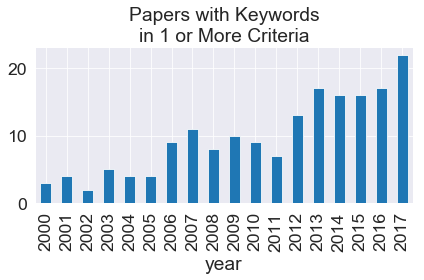

In [36]:
criteria_df = wosis.collate_keyword_criteria_matches(software_rc, crit_matches)
wos_plot.plot_criteria_trend(criteria_df, threshold=1)

In [37]:
policy = wosis.keyword_matches(software_rc, ['policy', 'adapt', 'decision support', 'management', 'gis'], threshold=95.0)

In [38]:
all_policy = policy.combine_recs()

In [39]:
policy_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_policy))

In [40]:
policy_phrases.display_phrases()

Sensitivity of population viability to spatial and nonspatial parameters using grip (2008) 
https://dx.doi.org/10.1890/07-1306.1 

We evaluated GRIP's performance as a tool for sensitivity analysis of spatial PVAs and explored the consequences of varying spatial input parameters for predictions of a published PVA model of the sand lizard (Lacerta agilis). 

Sensitivity analyses of population viability analysis (PVA) models can help measure relative parameter influences on predictions, identify research priorities for reducing uncertainty, and evaluate management strategies. 

We provide annotated code so that GRIP may be modified to reflect particular species biology, customized for more complex spatial PVA models, upgraded to incorporate features added in newer versions of RAMAS Metapop, used as a template to develop similar programs, or used as it is for computationally efficient sensitivity analyses in support of conservation planning. 

We developed GRIP, a program to facilitate se

We further illustrate the application of hydroPSO in two real-world case studies: we calibrate, first, a hydrological model for the Ega River Basin (Spain) and, second, a groundwater flow model for the Pampa del Tamarugal Aquifer (Chile). 


Infiltration under snow cover: Modeling approaches and predictive uncertainty (2017) 
https://dx.doi.org/10.1016/j.jhydrol.2016.12.042 

Further, our study demonstrated that an uncertainty analysis of model predictions is easily accomplished due to the low computational demand of the models and efficient calibration software and is absolutely worth the additional investment. 

Therefore, we established a snowmelt model calibration dataset that is both temporally dense and represents the integrated snowmelt infiltration signal for the Vers Chez le Brandt research catchment, which functions as a rather unique natural lysimeter. 

Lastly, development of a systematic instrumentation that evaluates the distributed, temporal evolution of snowpack drainag

K/yr and an increase in precipitation of  mm/yr. 

Climatic conditions in Germany continued to change over the investigation period, with an increase in temperature of . 

The IWD for the investigated crops in the area of the current "Federal Republic of Germany" over the  years was  mm/yr, varying between  and  mm/yr. 

Thus, the influence of climate change on water resources is relativized which brings an important input into the debate. 

Policy and management measures to adapt to climate change are currently being debated in Germany. 


Effect of Temporal and Spatial Rainfall Resolution on HSPF Predictive Performance and Parameter Estimation (2012) 
https://dx.doi.org/10.1061/(ASCE)HE.1943-5584.0000457 

when a spatially averaged network of four rain gauges was used. 

This study evaluated the effect of temporal and spatial rainfall resolution on the predictive performance of Hydrological Simulation Program-Fortran (HSPF) using manual and automatic calibration procedures. 

Further


Assessing the impact of managed-care on the distribution of length-of-stay using Bayesian hierarchical models (2000) 
https://dx.doi.org/10.1023/A:1009691326989 

In this paper, Bayesian inference through Markov Chain Monte Carlo methods is used for the analysis of a complex hierarchical log-normal model that shows the impact of a managed care strategy aimed at limiting length of hospital stays. 


A Multi-Attribute Decision Analysis for Decommissioning Offshore Oil and Gas Platforms (2015) 
https://dx.doi.org/10.1002/ieam.1693 

It found a near-consensus of stakeholders in support of partial removal and "rigs-to-reefs" program. 

The  oil and gas platforms off the coast of southern California are reaching the end of their economic lives. 

The project's results played a role in the decision to pass legislation enabling an expanded California "rigs-to-reefs" program that includes a mechanism for sharing cost savings between operators and the state. 

As part of a larger policy analysi

In [41]:
agri = wosis.keyword_matches(software_rc, ['agricultur', 'farm'], threshold=95.0)

In [42]:
all_agri = agri.combine_recs()

In [43]:
agri_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_agri))

In [44]:
agri_phrases.display_phrases()

Life cycle assessment of corn-based ethanol production in Argentina (2014) 
https://dx.doi.org/10.1016/j.scitotenv.2013.11.012 

In Argentina, the legislation has imposed the use of biofuels in blend with fossil fuels ( to %) in the transport sector. 

As functional unit,  MJ of anhydrous ethanol at biorefinery is chosen. 

For refinery system, corn production, supplied heat and burned natural gas result in the higher contributions. 

The use of fertilizers and resources, seeds production, harvesting process, corn drying, and phosphorus fertilizers and acetamide-anillide-compounds production are the most relevant processes in agricultural system. 

SimaPro is the life cycle assessment software used. 


Integration of a Three-Dimensional Process-Based Hydrological Model into the Object Modeling System (2016) 
https://dx.doi.org/10.3390/w8010012 

The integration of a spatial process model into an environmental modeling framework can enhance the model's capabilities. 

This study serves 

In [45]:
water = wosis.keyword_matches(software_rc, ['hydrology', 'water', 'stream', 'aquifer'], threshold=95.0)

In [46]:
all_water = water.combine_recs()

In [47]:
water_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_water))

In [48]:
water_phrases.display_phrases()

The OECD software tool for screening chemicals for persistence and long-range transport potential (2009) 
https://dx.doi.org/10.1016/j.envsoft.2008.06.014 

We present the software implementation of The OECD P-OV & LRTP Screening Tool (The Tool) that is used to assess the environmental hazard of organic chemicals using metrics of overall persistence (P-OV) and long-range transport potential (LRTP). 

The Tool is designed to support decision making for chemical management and includes features that are recommended by the Organization for Economic Cooperation and Development (OECD) expert group on multimedia modeling. 

The effect of uncertainties in input properties describing chemicals can be assessed with a Monte Carol analysis. 

The software is evaluated and illustrated by comparing results from The Tool with those from other models and by evaluating four substances that are candidates for regulation or ban under the Stockholm convention on Persistent Organic Pollutants. 

The Tool 

The results, based on  iterations sampled from inputs distributions (foreground parameters, ecoinvent background data and market prices), showed a significant advantage of VFU technology, both at a small and decentralized scale and at a large and centralized scale (% confidence intervals not including zero values). 

The benefits mainly concern the production of fertilizers, the decreased efforts at the WWTP, the water savings from toilets flushing, as well as the lower infrastructure volumes if the WWTP is redesigned (in case of significant reduction of nutrients load in wastewater). 

Additionally, particular attention was given to the propagation and analysis of inputs uncertainties. 


Stochastic cost optimization of DNAPL remediation - Method description and sensitivity study (2012) 
https://dx.doi.org/10.1016/j.envsoft.2012.05.002 

Uncertainty in DNAPL source delineation was found to have a large effect on the cost and probability of achieving remediation objectives for thermal 

Calibration results showed a large variability in the model outputs in function of the initial conditions and demonstrated that the tested model predictive capacity is very low. 


Analyzing the effects of geological and parameter uncertainty on prediction of groundwater head and travel time (2013) 
https://dx.doi.org/10.5194/hess-17-3245-2013 

Uncertainty of groundwater model predictions has in the past mostly been related to uncertainty in the hydraulic parameters, whereas uncertainty in the geological structure has not been considered to the same extent. 

In the second scenario the same  geological models were subjected to model optimization, where the hydraulic parameters for each of them were estimated by calibration against observations of hydraulic head and stream discharge. 

In the third scenario each geological model was run with  randomized sets of parameters. 

The analysis documented that the uncertainty on the conceptual geological model was as significant as the uncert

Scalable subsurface inverse modeling of huge data sets with an application to tracer concentration breakthrough data from magnetic resonance imaging (2016) 
https://dx.doi.org/10.1002/2015WR018483 

In this paper, we extend PCGA to handle a large number of measurements (e.g.,  or more) by constructing a fast preconditioner whose computational cost scales linearly with the data size. 

Characterizing subsurface properties is crucial for reliable and cost-effective groundwater supply management and contaminant remediation. 

Only about  forward simulations in total were required to obtain the best estimate with corresponding estimation uncertainty, and the estimated K field captured key patterns of the original packing design, showing the efficiency and effectiveness of the proposed method. 

However, characterization with such a large amount of information requires prohibitive computational costs associated with "big data'' processing and numerous large-scale numerical simulations. 


I

With increasing pressures of a changing climate, urban growth and economic constraints, the need for wider spread integration is necessary in the interest of a sustainable future. 


Numerical Modelling of Waste Stabilization Ponds: Where Do We Stand? (2012) 
https://dx.doi.org/10.1007/s11270-012-1098-4 

In spite of its relative simplicity of design, operation and maintenance, the various processes taking place in WSP have not been entirely quantified. 

Furthermore, it is evident from the review of the different models that calibration and validation with full-scale WSP data is also scarce. 

This paper aims at filling this gap. 

Lately, modelling has served as an important, low-cost tool for a better description and an improved understanding of the system. 

In-depth study of the published models reveals a clear evolution over time in the concept of modelling, from just hydraulic empirical models to D ones and from simple first-order water quality models to complex ones which descr

In [49]:
enviro = wosis.keyword_matches(software_rc, ['environment', 'climate', 'ecology', 'ecosystem', 'biodivers', 'conservation'], threshold=95.0)

In [50]:
all_enviro = enviro.combine_recs()

In [51]:
enviro_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_enviro))

In [52]:
enviro_phrases.display_phrases()

Assessment of environmental impacts and operational costs of the implementation of an innovative source-separated urine treatment (2017) 
https://dx.doi.org/10.1016/j.watres.2017.09.016 

In order to tackle the lack of stable data from the pilot plant and the complex effects on wastewater treatment plant (WWTP), process simulation was coupled with LCA and costs assessment using the Python programming language. 

Five scenarios of VFU implementation were compared to the conventional treatment of  m() of wastewater. 

The results, based on  iterations sampled from inputs distributions (foreground parameters, ecoinvent background data and market prices), showed a significant advantage of VFU technology, both at a small and decentralized scale and at a large and centralized scale (% confidence intervals not including zero values). 

The benefits mainly concern the production of fertilizers, the decreased efforts at the WWTP, the water savings from toilets flushing, as well as the lower inf

The fuzzy sensitivity analysis reveals the cause-effect relationship of these critical parameters. 

The growing consciousness about the health risks associated with environmental pollutants has brought a major shift in global concern towards prevention of hazardous/trace metals discharge in water bodies. 

Majority of these trace metals gets accumulated in the body of aquatic lives, which are considered as potential indicators of hazardous content. 

A case study of assessing the impact of trace metals on the aquatic life of river Ganges, India has also been presented to demonstrate effectiveness of the model. 

Trace metals such as Cd, Cr, Cu, Mn, Ni, Pb and Zn originated from various industrial operations containing metallic solutions and agricultural practices, have been contributing significantly to cause aquatic pollution. 


An object-oriented structural optimization program (2000) 
https://dx.doi.org/10.1007/s001580050146 

A brief mathematical formulation of structural optimiz

According to the results, the production of raw materials and the firing process in the magnesia spinel brick production were found to have several negative effects on the environment and were costly. 


A user-friendly software package for VIC hydrologic model development (2017) 
https://dx.doi.org/10.1016/j.envsoft.2017.09.006 

VIC-ASSIST enables users to navigate the model building process through prompts and automation, with the intention to promote the use of the model for practical, educational, and research purposes. 

The automated processes include watershed delineation, climate and geographical input set-up, model parameter calibration, sensitivity analysis, and graphical output generation. 


A comprehensive evaluation of various sensitivity analysis methods: A case study with a hydrological model (2014) 
https://dx.doi.org/10.1016/j.envsoft.2013.09.031 

For the Sobol' method, the minimum samples needed are  to compute the first-order and total sensitivity indices correctl

Also, based on the current cultivated area, on average, the volume of water demand only for the aforementioned crops will be approximately . 

Climate change scenarios of climatic variables are first weighted by using the mean observed temperature-precipitation (MOTP) method, and related probability distribution functions are produced. 

Atmosphere-ocean global circulation models (AOGCMs) are used to simulate climatic variables such as temperature and precipitation. 

The results indicate that risk of changes in crop water requirements increases by approximately % for a % risk, approximately % for a % risk, and approximately % for a % risk. 


Groundwater fluxes in a shallow seasonal wetland pond: The effect of bathymetric uncertainty on predicted water and solute balances (2014) 
https://dx.doi.org/10.1016/j.jhydrol.2014.06.020 

We demonstrate that bathymetry can be successfully represented within the model in a simple parametric form using a cubic Sexier curve, allowing an assessmen

An integrated framework for multipollutant air quality management and its application in georgia (2007) 
https://dx.doi.org/10.1007/s00267-006-0228-4 

Emerging software enables the modeling of health benefits and associated economic valuations resulting from air pollution control. 

The fuller characterization both informs the selection of control options and facilitates the communication of impacts to affected stakeholders and the public. 

Air protection agencies in the United States increasingly confront non-attainment of air quality standards for multiple pollutants sharing interrelated emission origins. 

Recognizing those limitations, the Georgia Environmental Protection Division has adopted an integrated framework to address ozone, fine particulate matter, and regional haze in the state. 

Traditional approaches to attainment planning face important limitations that are magnified in the multipollutant context. 


Estimating storm discharge and water quality data uncertainty: A 

In [53]:
socio_ec = wosis.keyword_matches(software_rc, ['ecosystem service', 'social', 'conflict', 'particip', 'law', 'stakehold', 'policy', 'economic'], threshold=95.0)

In [54]:
all_socio_ec = socio_ec.combine_recs()

In [55]:
socio_ec_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_socio_ec))

In [56]:
socio_ec_phrases.display_phrases()

Assessment of environmental impacts and operational costs of the implementation of an innovative source-separated urine treatment (2017) 
https://dx.doi.org/10.1016/j.watres.2017.09.016 

In order to tackle the lack of stable data from the pilot plant and the complex effects on wastewater treatment plant (WWTP), process simulation was coupled with LCA and costs assessment using the Python programming language. 

Five scenarios of VFU implementation were compared to the conventional treatment of  m() of wastewater. 

The results, based on  iterations sampled from inputs distributions (foreground parameters, ecoinvent background data and market prices), showed a significant advantage of VFU technology, both at a small and decentralized scale and at a large and centralized scale (% confidence intervals not including zero values). 

The benefits mainly concern the production of fertilizers, the decreased efforts at the WWTP, the water savings from toilets flushing, as well as the lower inf

Disaster prevention planning is affected in a significant way by a lack of in-depth understanding of the numerous uncertainties involved with flood delineation and related estimations. 

The study area was the Langat River Basin in Malaysia. 

The uncertainty is addressed through the application of non-parametric bootstrap sampling to the hydrodynamic modelling software, HEC-RAS, integrated with Geographic Information System (GIS). 

The results revealed that the inundated land and infrastructure are subject to a flooding hazard of high-frequency events and that the flood damage potential is increasing significantly for residential areas and valuable land-use classes with higher return periods. 


Groundwater fluxes in a shallow seasonal wetland pond: The effect of bathymetric uncertainty on predicted water and solute balances (2014) 
https://dx.doi.org/10.1016/j.jhydrol.2014.06.020 

We demonstrate that bathymetry can be successfully represented within the model in a simple parametric

In [57]:
med = wosis.keyword_matches(software_rc, ['infection', 'disease', 'injury', 'medicine', 'cancer', 'treatment', 'health'], threshold=95.0)

In [58]:
all_med = med.combine_recs()

In [59]:
med_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_med))

In [60]:
med_phrases.display_phrases()

Assessment of environmental impacts and operational costs of the implementation of an innovative source-separated urine treatment (2017) 
https://dx.doi.org/10.1016/j.watres.2017.09.016 

In order to tackle the lack of stable data from the pilot plant and the complex effects on wastewater treatment plant (WWTP), process simulation was coupled with LCA and costs assessment using the Python programming language. 

Five scenarios of VFU implementation were compared to the conventional treatment of  m() of wastewater. 

The results, based on  iterations sampled from inputs distributions (foreground parameters, ecoinvent background data and market prices), showed a significant advantage of VFU technology, both at a small and decentralized scale and at a large and centralized scale (% confidence intervals not including zero values). 

The benefits mainly concern the production of fertilizers, the decreased efforts at the WWTP, the water savings from toilets flushing, as well as the lower inf

In [61]:
chem = wosis.keyword_matches(software_rc, ['chem', 'reaction', 'catalyst', 'isotope'], threshold=95.0)

In [62]:
all_chem = chem.combine_recs()

In [63]:
chem_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_chem))

In [64]:
chem_phrases.display_phrases()

A toolbox using the stochastic optimization algorithm MIPT and ChemCAD for the systematic process retrofit of complex chemical processes (2016) 
https://dx.doi.org/10.1016/j.compchemeng.2015.08.023 

An optimization framework for the purpose of retrofitting using a rigorous process simulation tool is proposed to fulfill this task. 

The results of a sensitivity analysis and the optimization for different feed compositions are presented. 

The toolbox provides a quick evaluation of the process by searching for the global optimum. 

The usage of a rigorous process simulator is providing a high accuracy of the thermodynamic results which is necessary to evaluate the influence of the new process design. 

To simplify the user input a graphical user interface was programmed. 


The OECD software tool for screening chemicals for persistence and long-range transport potential (2009) 
https://dx.doi.org/10.1016/j.envsoft.2008.06.014 

We present the software implementation of The OECD P-OV & L

To compute these derivatives with the minimum CPU cost, a combination of the direct differentiation and the discrete adjoint variable method is proposed. 

The extension to D and D flow problems, after developing the corresponding direct differentiation and adjoint variable methods and software, is straightforward. 


Scalable subsurface inverse modeling of huge data sets with an application to tracer concentration breakthrough data from magnetic resonance imaging (2016) 
https://dx.doi.org/10.1002/2015WR018483 

In this paper, we extend PCGA to handle a large number of measurements (e.g.,  or more) by constructing a fast preconditioner whose computational cost scales linearly with the data size. 

Characterizing subsurface properties is crucial for reliable and cost-effective groundwater supply management and contaminant remediation. 

Only about  forward simulations in total were required to obtain the best estimate with corresponding estimation uncertainty, and the estimated K field